<a href="https://www.kaggle.com/mattymyers22/european-football-eda-feb-22?scriptVersionId=87010800" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Using R to Run SQLite Queries Through a Database Connection
*by: Matthew Myers*

The purpose of this notebook is to use R to connect to a SQL database and run queries to perform some EDA with European Football data. All queries are from a previous project of mine, and ran in SQLite with the visualizations created in Tableau. Links to the previous work listed below. Any upvotes or feedback is greatly appreciated :)

SQL Code: https://github.com/MattyMyers22/Soccer-Analytics/blob/main/Euro%20Soccer%20Database%2008%20-%2016%20SQL%20EDA

Tableau Dashboard: https://public.tableau.com/app/profile/matthew.myers4646/viz/EuroSoccerEDA200809-2001516/EuroSoccer1

Shoutout to hugomathien for the database! This is a massive DB for the 2008/09 - 2015/16 seasons, with many different possibilities for exploring. 

For more information on the DB -> https://www.kaggle.com/hugomathien/soccer

## Table of Contents

* [1. Packages and DB Connection](#section-1)
* [2. Overview of Tables and Data](#section-2)
* [3. Goal Stats From Top 6 Leagues](#section-3)
* [4. Top 10 Seasons for Avg Goals](#section-4)
* [5. Proportion of Birth Months for Professional Players](#section-5)
* [Conclusion](#conclusion)



<a id="section-1"></a>
## 1. Packages and DB Connection

In [1]:
library(DBI) # Connect to and run queries through database
library(RSQLite) # Run SQLite code with the SQLite DB
library(ggplot2) # Create visualizations
library(dplyr) # Data Manipulation
library(lubridate) # Work with dates

# Establish connection to database
con <- dbConnect(SQLite(), dbname = "../input/soccer/database.sqlite")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




<a id="section-2"></a>
## 2. Overview of Tables and Data

In [2]:
dbListTables(con) # List tables from DB

[1] "Country"           "League"            "Match"            
[4] "Player"            "Player_Attributes" "Team"             
[7] "Team_Attributes"   "sqlite_sequence"

We're only going to work with the Country, League, Match, and Player databases for this project, so we'll dive into those a little more. Due to the Match table containing so many columns, we'll start with looking at the list of fields for that one.

In [3]:
# Country Table
dbReadTable(con, "Country")

id,name
<int>,<chr>
1,Belgium
1729,England
4769,France
7809,Germany
10257,Italy
13274,Netherlands
15722,Poland
17642,Portugal
19694,Scotland


In [4]:
# League Table
dbReadTable(con, "League")

id,country_id,name
<int>,<int>,<chr>
1,1,Belgium Jupiler League
1729,1729,England Premier League
4769,4769,France Ligue 1
7809,7809,Germany 1. Bundesliga
10257,10257,Italy Serie A
13274,13274,Netherlands Eredivisie
15722,15722,Poland Ekstraklasa
17642,17642,Portugal Liga ZON Sagres
19694,19694,Scotland Premier League


In [5]:
# Match Fields
dbListFields(con, "Match")

[1] "id"               "country_id"       "league_id"       
  [4] "season"           "stage"            "date"            
  [7] "match_api_id"     "home_team_api_id" "away_team_api_id"
 [10] "home_team_goal"   "away_team_goal"   "home_player_X1"  
 [13] "home_player_X2"   "home_player_X3"   "home_player_X4"  
 [16] "home_player_X5"   "home_player_X6"   "home_player_X7"  
 [19] "home_player_X8"   "home_player_X9"   "home_player_X10" 
 [22] "home_player_X11"  "away_player_X1"   "away_player_X2"  
 [25] "away_player_X3"   "away_player_X4"   "away_player_X5"  
 [28] "away_player_X6"   "away_player_X7"   "away_player_X8"  
 [31] "away_player_X9"   "away_player_X10"  "away_player_X11" 
 [34] "home_player_Y1"   "home_player_Y2"   "home_player_Y3"  
 [37] "home_player_Y4"   "home_player_Y5"   "home_player_Y6"  
 [40] "home_player_Y7"   "home_player_Y8"   "home_player_Y9"  
 [43] "home_player_Y10"  "home_player_Y11"  "away_player_Y1"  
 [46] "away_player_Y2"   "away_player_Y3"   "away_player_Y4"  
 [49] "away_player_Y5"   "away_player_Y6"   "away_player_Y7"  
 [52] "away_player_Y8"   "away_player_Y9"   "away_player_Y10" 
 [55] "away_player_Y11"  "home_player_1"    "home_player_2"   
 [58] "home_player_3"    "home_player_4"    "home_player_5"   
 [61] "home_player_6"    "home_player_7"    "home_player_8"   
 [64] "home_player_9"    "home_player_10"   "home_player_11"  
 [67] "away_player_1"    "away_player_2"    "away_player_3"   
 [70] "away_player_4"    "away_player_5"    "away_player_6"   
 [73] "away_player_7"    "away_player_8"    "away_player_9"   
 [76] "away_player_10"   "away_player_11"   "goal"            
 [79] "shoton"           "shotoff"          "foulcommit"      
 [82] "card"             "cross"            "corner"          
 [85] "possession"       "B365H"            "B365D"           
 [88] "B365A"            "BWH"              "BWD"             
 [91] "BWA"              "IWH"              "IWD"             
 [94] "IWA"              "LBH"              "LBD"             
 [97] "LBA"              "PSH"              "PSD"             
[100] "PSA"              "WHH"              "WHD"             
[103] "WHA"              "SJH"              "SJD"             
[106] "SJA"              "VCH"              "VCD"             
[109] "VCA"              "GBH"              "GBD"             
[112] "GBA"              "BSH"              "BSD"             
[115] "BSA"

In [6]:
# Player Table
dbReadTable(con, "Player")

id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
<int>,<int>,<chr>,<int>,<chr>,<dbl>,<int>
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181


<a id="section-3"></a>
## 3. Goal Stats From Top 6 Leagues

For this project I wanted to dive into different goal metrics between the top 6 leagues in Europe (England, Spain, Germany, Italy, France, Portugal).

In [7]:
# Avg of team goals in top 6 leagues overall
dbGetQuery(con, "SELECT c.name AS country, l.name AS league, ROUND(AVG(m.home_team_goal), 2) AS avg_home_goals, 
  ROUND(AVG(m.away_team_goal), 2) AS avg_away_goals, ROUND(AVG(m.home_team_goal + m.away_team_goal), 2)
  AS avg_goals_per_game, ROUND(AVG(m.home_team_goal - m.away_team_goal), 2)
  AS avg_goal_dif, SUM(m.home_team_goal + m.away_team_goal) AS total_goals, 
  COUNT(DISTINCT season) AS seasons, COUNT(DISTINCT stage) AS stages, COUNT(m.id) AS matches
FROM Country AS c
LEFT JOIN League AS l ON c.id = l.country_id
LEFT JOIN Match AS m ON c.id = m.country_id AND l.id = m.league_id
WHERE country IN ('England', 'France', 'Germany', 'Italy', 'Portugal', 'Spain')
GROUP BY country
ORDER BY avg_goals_per_game DESC, total_goals DESC")

country,league,avg_home_goals,avg_away_goals,avg_goals_per_game,avg_goal_dif,total_goals,seasons,stages,matches
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
Germany,Germany 1. Bundesliga,1.63,1.27,2.90,0.35,7103,8,34,2448
Spain,Spain LIGA BBVA,1.63,1.14,2.77,0.50,8412,8,38,3040
England,England Premier League,1.55,1.16,2.71,0.39,8240,8,38,3040
Italy,Italy Serie A,1.50,1.12,2.62,0.38,7895,8,38,3017
Portugal,Portugal Liga ZON Sagres,1.41,1.13,2.53,0.28,5201,8,34,2052
France,France Ligue 1,1.40,1.04,2.44,0.36,7427,8,38,3040


In my time of following European Football, something I often hear about is how the Italian league values defending more than the other top leagues. It was to my surprise to not find them as the league with the lowest average goals in any of the categories.

Based on these seasons, Germany produced more goals per game on average, while Spain appears to have the biggest home field advantage by goals.

<a id="section-4"></a>
## 4. Top 10 Seasons for Avg Goals

Let's take a look at which Top 6 seasons from 2008/09 - 2015/16 were the most exciting based on a goals per game metric.

In [8]:
dbGetQuery(con, "SELECT c.name AS country, l.name AS league, season, ROUND(AVG(m.home_team_goal + m.away_team_goal), 2)
  AS avg_goals_per_game, ROUND(AVG(m.home_team_goal - m.away_team_goal), 2)
  AS avg_goal_dif, SUM(m.home_team_goal + m.away_team_goal) AS total_goals, 
  COUNT(m.id) AS matches
FROM Country AS c
LEFT JOIN League AS l ON c.id = l.country_id
LEFT JOIN Match AS m ON c.id = m.country_id AND l.id = m.league_id
WHERE country IN ('England', 'France', 'Germany', 'Italy', 'Portugal', 'Spain')
GROUP BY country, m.season
ORDER BY avg_goals_per_game DESC, total_goals DESC
LIMIT 10")

country,league,season,avg_goals_per_game,avg_goal_dif,total_goals,matches
<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>
Germany,Germany 1. Bundesliga,2013/2014,3.16,0.34,967,306
Germany,Germany 1. Bundesliga,2012/2013,2.93,0.25,898,306
Germany,Germany 1. Bundesliga,2010/2011,2.92,0.37,894,306
Germany,Germany 1. Bundesliga,2008/2009,2.92,0.48,894,306
Spain,Spain LIGA BBVA,2008/2009,2.90,0.42,1101,380
Spain,Spain LIGA BBVA,2012/2013,2.87,0.50,1091,380
Germany,Germany 1. Bundesliga,2011/2012,2.86,0.46,875,306
Germany,Germany 1. Bundesliga,2015/2016,2.83,0.30,866,306
Germany,Germany 1. Bundesliga,2009/2010,2.83,0.20,866,306


To little surprise, the Bundesliga dominates the list of top seasons by avg goals per game with 7 out of the top 10 seasons. 

<a id="section-5"></a>
## 5. Proportion of Birth Months for Professional Players

Another theme I had heard about regarding professional players is that they are disproportionately born earlier in a calendar year. I haven't heard of that being the case for any other sports, but that could be something to look into as well. For now I wanted to see if that was the case for European Football players.

This time I will use the dbSendQuery() and dbFetch() functions to pull the data from the database.

In [9]:
# Breakdown of professional player birthday months
birth_distr <- dbSendQuery(con, "SELECT STRFTIME('%m', birthday) AS month, 
  COUNT(STRFTIME('%m', birthday)) AS births_in_month,
  (SELECT COUNT(id) FROM Player) AS total_players
FROM Player
GROUP BY month")

birth_mon <- dbFetch(birth_distr) # Fetch Query Results
dbClearResult(birth_distr) # Clear Results
birth_mon

month,births_in_month,total_players
<chr>,<int>,<int>
01,1204,11060
02,1073,11060
03,1154,11060
04,980,11060
05,994,11060
06,877,11060
07,826,11060
08,906,11060
09,866,11060


In SQLite I was able to calculate the proportions of players born in each month, with the month name, by using a CTE (common table expression) to do this. At this time, it doesn't appear that I can run that through DBI calls, so I'll finish the calculations in R.

In [10]:
# Proportion of births in each month
birth_mon <- birth_mon %>%
  mutate(month = month.abb[as.numeric(month)],
         prop = births_in_month / total_players,
         prop = round(prop, digits = 3) * 100)
birth_mon

month,births_in_month,total_players,prop
<chr>,<int>,<int>,<dbl>
Jan,1204,11060,10.9
Feb,1073,11060,9.7
Mar,1154,11060,10.4
Apr,980,11060,8.9
May,994,11060,9.0
Jun,877,11060,7.9
Jul,826,11060,7.5
Aug,906,11060,8.2
Sep,866,11060,7.8


Now we need to set the months as an ordered factor, otherwise they will order alphabetically for the visualization.

In [11]:
# Set months to factor
my_factor <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep",
                "Oct", "Nov", "Dec") # create factor vector in order

birth_mon <- birth_mon %>%
  mutate(month = as.factor(month),
         month = factor(month, levels = my_factor))
birth_mon

month,births_in_month,total_players,prop
<fct>,<int>,<int>,<dbl>
Jan,1204,11060,10.9
Feb,1073,11060,9.7
Mar,1154,11060,10.4
Apr,980,11060,8.9
May,994,11060,9.0
Jun,877,11060,7.9
Jul,826,11060,7.5
Aug,906,11060,8.2
Sep,866,11060,7.8


Let us visualize the results.

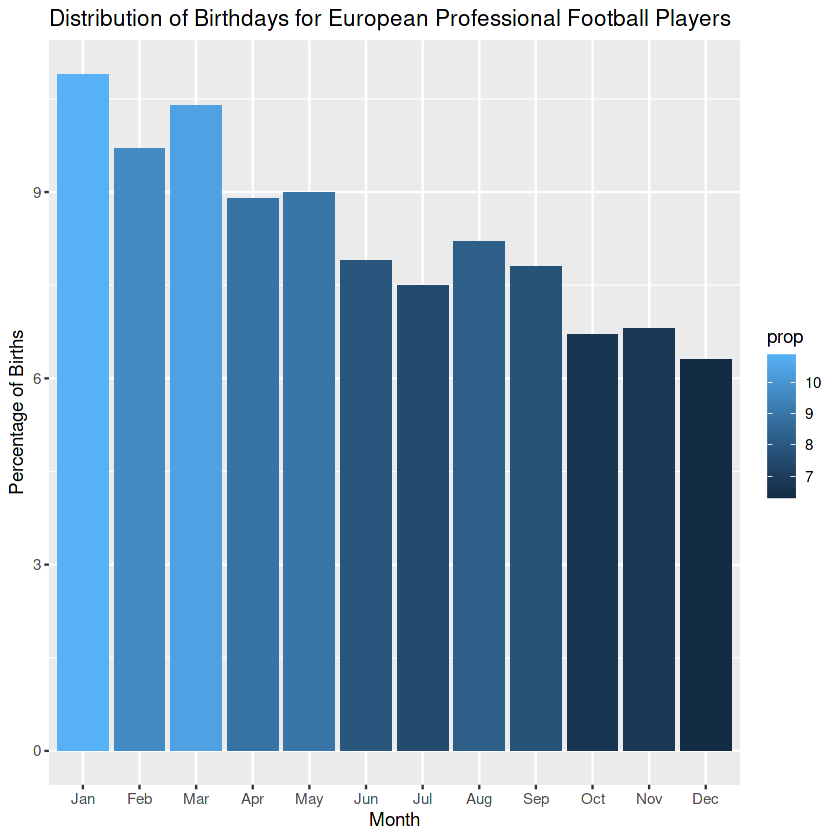

In [12]:
# Proportion of births in each month visualization
birth_gr <- ggplot(birth_mon, aes(month, prop, fill = prop)) +
            geom_col() +
            labs(x = "Month", y = "Percentage of Births", 
                 title = "Distribution of Birthdays for European Professional Football Players")
birth_gr

Edit: It was pointed out that the data for births in each month needs to be normalized for the number of days in each month. Thanks to Prof. Tim Scharks for pointing that out :) We'll do that below.

In [13]:
# Get births as day of year
birth_days <- dbGetQuery(con, "SELECT CAST(STRFTIME('%j', birthday) AS INT) AS day_of_year, 
  COUNT(STRFTIME('%j', birthday)) AS births_on_day
FROM Player
GROUP BY day_of_year")
birth_days

day_of_year,births_on_day
<int>,<int>
1,61
2,33
3,36
4,36
5,43
6,34
7,43
8,49
9,31


There's the breakdown of the birthdays, now let's visualize it with a line of best fit to help see the relationship.

`geom_smooth()` using formula 'y ~ x'



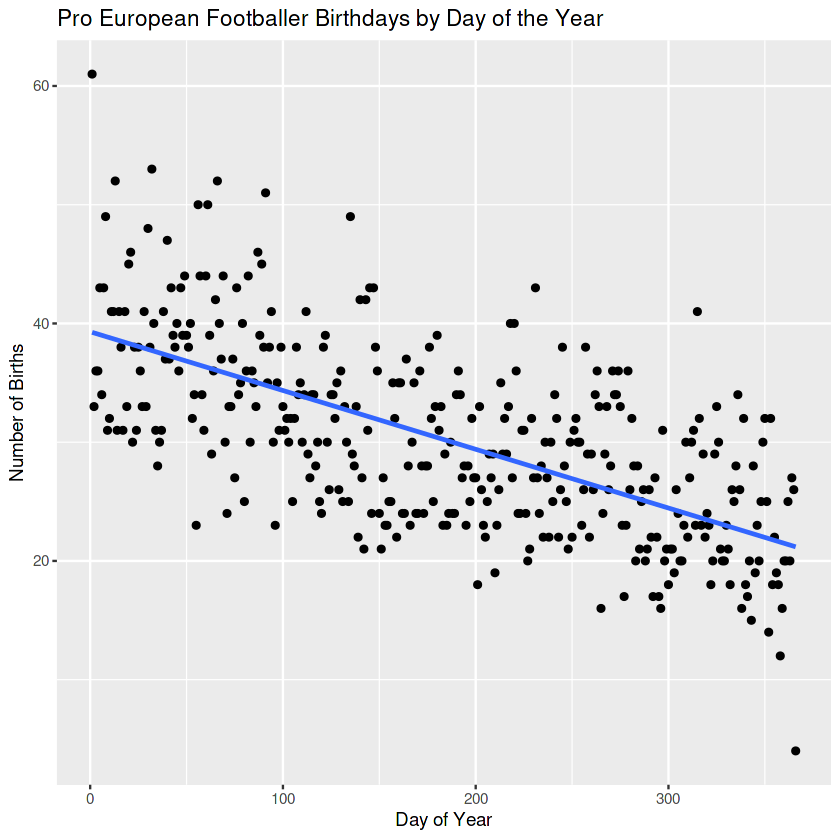

In [14]:
# Visualizing day of year birth counts
day_gr <- ggplot(birth_days, aes(day_of_year, births_on_day)) + 
        geom_point() +
        labs(x = "Day of Year", y = "Number of Births", 
             title = "Pro European Footballer Birthdays by Day of the Year") +
        geom_smooth(method = "lm", se = FALSE)
day_gr

Now let's quantify the relationship by calculating the correlation coefficient.

In [15]:
# Calculate the correlation
cor(birth_days$day_of_year, birth_days$births_on_day)

[1] -0.6494482

It appears there is moderate negative relationship between the number of professional footballers in Europe born on a specific day and the day of the year. That is the amount of footballers born on a given day tends to decrease as the year goes on. One theory is that many countries run their youth sports on a birth year bases unlike the school year in the US. Leading to kids born earlier in the year being able to develop quicker and dominate the game growing up.

<a id="conclusion"></a>
## Conclusion

Being able to use R to connect to a database and pull data to work with opens up many possibities. Plus it can simplify the process of working with data from different files and databases. As I get into more complex SQL queries, I'll have to keep testing the capabilities of the DBI package to figure out what I can and cannot do with the Fetch function. I do know that a plus of the dbSendQuery() and dbFetchQuery() functions is that the fetch can be run through something like a while loop to pull different rows at a time.

Now, to sign off and end it by disconnecting from the database.

In [16]:
dbDisconnect(con) # disconnect from DB